In [1]:
from deepface import DeepFace

from retinaface import RetinaFace
from retinaface.commons import postprocess

import cv2
import matplotlib.pyplot as plt

from deepface.detectors import (
    FaceDetector,
)

In [2]:
face_detector = FaceDetector.build_model("retinaface")
threshold = 0.95
align = True

img = cv2.imread("/media/bao/t7/la_lib_dataset/img/0c4Ihr0HqTDAem2zPKIe-F.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
obj = RetinaFace.detect_faces(img, model=face_detector, threshold=threshold)

if type(obj) == dict:
    for key in obj:
        identity = obj[key]
        facial_area = identity["facial_area"]
        confidence = identity["score"]

        y = facial_area[1]
        h = facial_area[3] - y
        x = facial_area[0]
        w = facial_area[2] - x
        img_region = [x, y, w, h]

        # detected_face = img[int(y):int(y+h), int(x):int(x+w)] #opencv
        detected_face = img[facial_area[1] : facial_area[3], facial_area[0] : facial_area[2]]

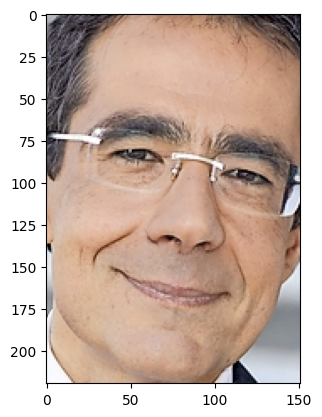

In [4]:
rgb_detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_detected_face)

In [5]:
landmarks = identity["landmarks"]
left_eye = landmarks["left_eye"]
right_eye = landmarks["right_eye"]
nose = landmarks["nose"]
# mouth_right = landmarks["mouth_right"]
# mouth_left = landmarks["mouth_left"]

aligned_detected_face = postprocess.alignment_procedure(detected_face, right_eye, left_eye, nose)

In [6]:
img = cv2.circle(img, (int(left_eye[0]), int(left_eye[1])), 2, (0, 0, 255), 2)
img = cv2.circle(img, (int(right_eye[0]), int(right_eye[1])), 2, (0, 0, 255), 2)
img = cv2.circle(img, (int(right_eye[0]), int(left_eye[1])), 2, (0, 0, 255), 2)
img = cv2.circle(img, (int(nose[0]), int(nose[1])), 2, (255, 0, 0), 2)

detected_face_w_landmarks = img[facial_area[1] : facial_area[3], facial_area[0] : facial_area[2]]

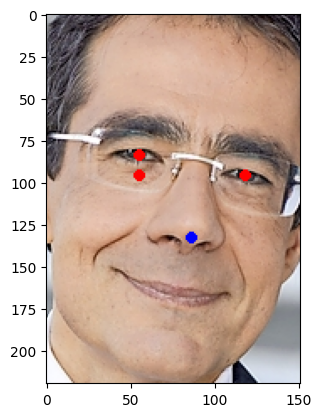

In [7]:
rgb_detected_face_w_landmarks = cv2.cvtColor(detected_face_w_landmarks, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_detected_face_w_landmarks)

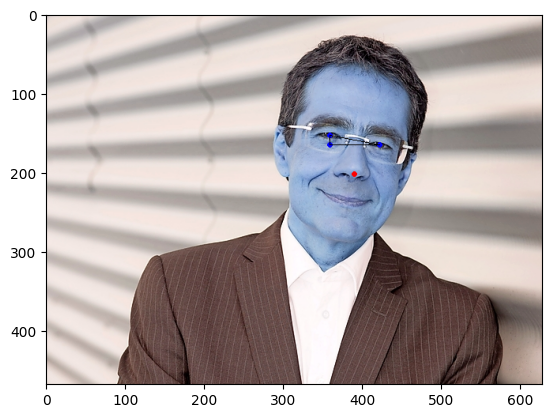

In [8]:
# add line to img between left_eye and right_eye
img = cv2.line(img, (int(left_eye[0]), int(left_eye[1])), (int(right_eye[0]), int(right_eye[1])), (0, 0, 0), 1)
# add line to make a right angle between left_eye and right_eye
img = cv2.line(img, (int(right_eye[0]), int(left_eye[1])), (int(left_eye[0]), int(left_eye[1])), (0, 0, 0), 1)
img = cv2.line(img, (int(right_eye[0]), int(left_eye[1])), (int(right_eye[0]), int(right_eye[1])), (0, 0, 0), 1)


plt.imshow(img)

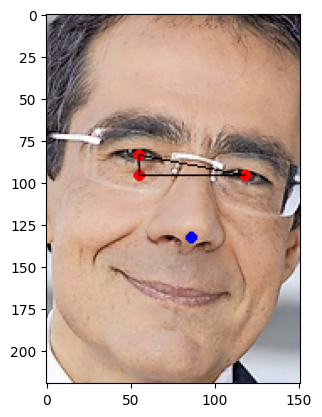

In [9]:
rgb_detected_face_w_landmarks = cv2.cvtColor(detected_face_w_landmarks, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_detected_face_w_landmarks)

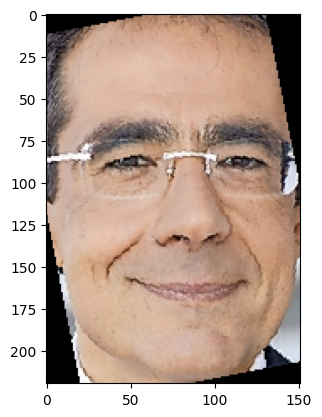

In [10]:
rgb_aligned_detected_face = cv2.cvtColor(aligned_detected_face, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_aligned_detected_face)

In [11]:
aligned_detected_face_w_landmark = postprocess.alignment_procedure(detected_face_w_landmarks, right_eye, left_eye, nose)

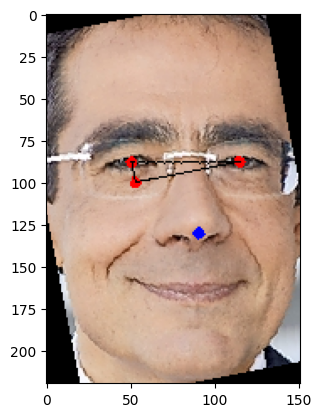

In [12]:
rgb_aligned_detected_face_w_landmark = cv2.cvtColor(aligned_detected_face_w_landmark, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_aligned_detected_face_w_landmark)

Text(0.5, 1.0, 'Aligned detected face with landmarks')

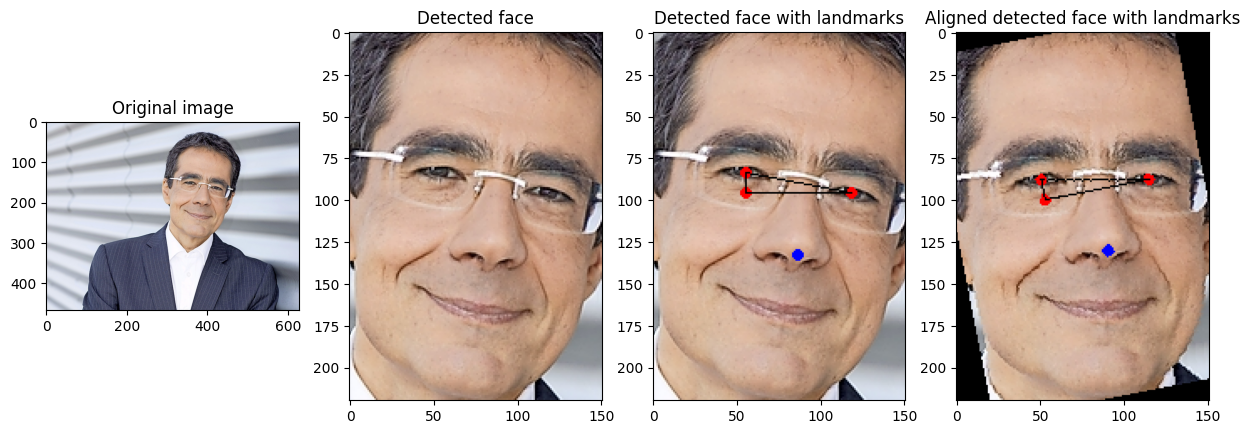

In [14]:
# 1x3 grid
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

axs[0].imshow(rgb_img)
axs[0].set_title("Original image")

axs[1].imshow(rgb_detected_face)
axs[1].set_title("Detected face")

axs[2].imshow(rgb_detected_face_w_landmarks)
axs[2].set_title("Detected face with landmarks")

axs[3].imshow(rgb_aligned_detected_face_w_landmark)
axs[3].set_title("Aligned detected face with landmarks")